In [11]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the CSV file and store it in a pandas DataFrame called "df"
df = pd.read_csv("D:\extracted_features_charrec_dense7.csv")

df


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class_name
0,27.630783,0.000000,51.067493,0.0,26.302004,0.000000,0.000000,0.0,0.0,0.000000,...,35.563477,8.822042,0.0,18.269510,82.596970,0.000000,0.000000,1.751286,0.0,3333
1,41.934185,0.000000,57.616398,0.0,40.345722,0.000000,0.000000,0.0,0.0,0.000000,...,33.432617,22.573324,0.0,25.266916,71.188900,0.000000,0.000000,0.000000,0.0,3333
2,59.681458,0.000000,35.450397,0.0,51.084698,0.000000,0.000000,0.0,0.0,4.531399,...,17.747238,22.295591,0.0,9.600313,39.380276,0.000000,0.000000,13.358544,0.0,3333
3,25.652845,0.000000,42.711246,0.0,26.391441,0.000000,0.000000,0.0,0.0,0.000000,...,25.998358,12.029038,0.0,19.127953,60.226376,0.000000,0.000000,0.000000,0.0,3333
4,51.862490,0.000000,25.455917,0.0,48.505250,0.000000,0.000000,0.0,0.0,0.000000,...,27.024067,1.758605,0.0,17.696215,64.634834,0.000000,0.000000,9.861172,0.0,3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,0.000000,8.917019,12.606703,0.0,0.000000,23.875010,0.000000,0.0,0.0,9.403310,...,0.000000,9.477231,0.0,0.000000,46.723995,0.000000,20.901190,7.003646,0.0,3454
6653,12.088920,3.646342,28.106102,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,38.677414,0.000000,1.824834,7.562943,0.0,3454
6654,0.000000,0.000000,53.899130,0.0,0.000000,0.000000,12.079654,0.0,0.0,0.000000,...,12.388772,58.245360,0.0,0.000000,47.787598,5.880453,0.000000,3.556168,0.0,3454
6655,0.000000,0.000000,37.811558,0.0,0.000000,0.000000,8.555406,0.0,0.0,0.000000,...,7.663426,23.674717,0.0,0.000000,53.260387,3.350826,0.000000,8.673196,0.0,3454


In [ ]:
# Create a new DataFrame "X" that contains all columns from "df" except for "class_name"
X = df.drop(columns=['class_name']) 

# Create a new Series "y" that only contains the "class_name" column from "df"
y = df['class_name']

In [5]:
# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05


# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

def activate(sum):
    """
    Activation function that returns 1 if the sum is greater than or equal to zero, 
    and returns 0 otherwise.
    """
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    """
    Trains a perceptron with the given weights, learning rate, maximum number of epochs,
    and input data. Returns the trained weights and a list of error values for each epoch.
    """
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data):
    """
    Tests the perceptron with the given weights and input data. Prints the input,
    target, and prediction for each input in the data set, and calculates the accuracy
    of the predictions.
    """
    correct = 0
    for i in range(len(data)):
        x1, x2 = data[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(data)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, inputs)


Trained Weights:
W0: 1.6999999999999933, W1: -1.6000000000000008, W2: -1.6000000000000005

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 0
Accuracy: 0.0%


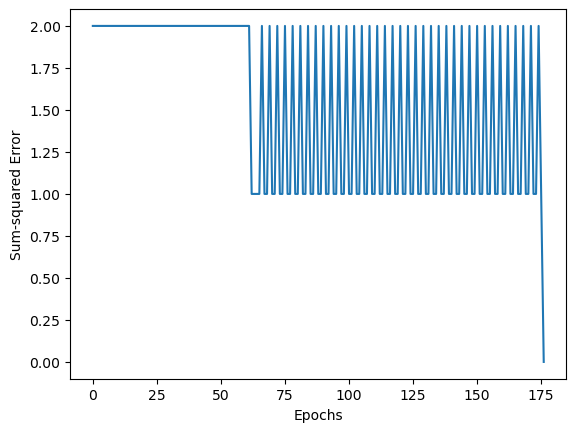

Number of epochs: 177


In [42]:


# Define the step activation function
def step(x):
    return np.where(x >= 0, 1, 0)

# Define the AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 1])

# Define the initial weights and learning rate
w = np.array([10, 0.2, -0.75])
alpha = 0.05

# Define the error threshold and maximum number of epochs
error_threshold = 0.002
max_epochs = 1000

# Initializing the error and epoch counters
errors = []
epochs = 0

# Train the perceptron
while True:
    # Calculate the net input
    net_input = np.dot(X, w[1:]) + w[0]
    
    # Apply the activation function
    output = step(net_input)
    
    # Calculate the error
    error = y - output
    
    # Calculate the sum-squared error
    sse = np.sum(error ** 2)
    errors.append(sse)
    
    # Update the weights
    w[1:] += alpha * np.dot(X.T, error)
    w[0] += alpha * error.sum()
    
    # Increment the epoch counter
    epochs += 1
    
    # Check for convergence
    if sse <= error_threshold or epochs >= max_epochs:
        break

# Plot the errors over time
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared Error')
plt.show()

# Print the number of epochs needed for convergence
print('Number of epochs:', epochs)


In [56]:
#2

# Define initial weights and learning rate
weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Training data for AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Activation functions
step = lambda x: np.where(x < 0, -1, 1)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
relu = lambda x: max(0, x)

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, inputs, targets, activation_fn):
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            x1, x2 = inputs[i]
            target = targets[i]
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            activated_sum = activation_fn(weighted_sum)
            error = target - activated_sum
            total_error += error
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Test different activation functions and compare iterations
activation_functions = [("Bi-Polar Step", step), ("Sigmoid", sigmoid), ("ReLU", relu)]

for activation_name, activation_fn in activation_functions:
    print(f"\nTraining with {activation_name} Activation Function:")
    trained_weights, error_values = train_perceptron(weights, learning_rate, 100, inputs, targets, activation_fn)
    print(f"Trained Weights: {trained_weights}")
    print(f"Error Values: {error_values}")
    



Training with Bi-Polar Step Activation Function:
Trained Weights: [ 0.4   0.2  -0.35]
Error Values: [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -1, -1, -3, -1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -3, -1, -1, -1, -1, -1, -3, 1, -3, 1, -3, 1, -3, 1]

Training with Sigmoid Activation Function:
Trained Weights: [-1.79865988  1.05047727  0.8628388 ]
Error Values: [-1.2631783769081215, -1.1984593886756425, -1.1380537592267068, -1.0817939608142186, -1.0294774864837626, -0.980881482282478, -0.9357738134181022, -0.8939211501310942, -0.8550946616185882, -0.8190738503285027, -0.7856489786560228, -0.7546224557249184, -0.7258094740625135, -0.6990381190820145, -0.6741491194127467, -0.6509953625287934, -0.6294412663105593, -0.6093620714193091, -0.59064310

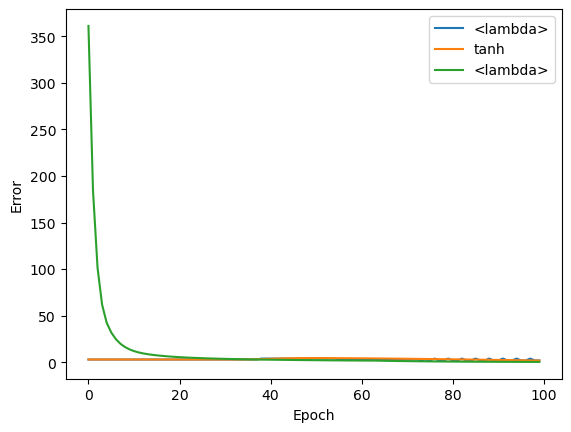

In [79]:
#2

# Define the step activation function
step = lambda x: np.where(x>=0, 1, 0)

# Define the AND gate training data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

# Train the perceptron with different activation functions
for activation in [step, np.tanh, lambda x: np.maximum(0, x)]:
    # Define the initial weights and learning rate
    w = np.array([10, 0.2, -0.75])
    alpha = 0.05
    # Train the perceptron
    errors = []
    for i in range(100):
        # Calculate the output and error
        output = activation(np.dot(X, w[1:]) + w[0])
        error = y - output
        errors.append(np.sum(error**2))
        # Update the weights
        w[1:] += alpha * np.dot(X.T, error)
        w[0] += alpha * np.sum(error)
        # Check for convergence
        if errors[-1] <= 0.002:
            print(f"{activation.__name__} converged after {i+1} iterations")
            break
    # Plot the error over time
    plt.plot(errors, label=activation.__name__)

plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()


Learning rate 0.1 converged after 68 iterations
Learning rate 0.2 converged after 38 iterations
Learning rate 0.3 converged after 29 iterations
Learning rate 0.4 converged after 22 iterations
Learning rate 0.5 converged after 19 iterations
Learning rate 0.6 converged after 21 iterations
Learning rate 0.7 converged after 15 iterations
Learning rate 0.8 converged after 14 iterations
Learning rate 0.9 converged after 14 iterations
Learning rate 1 converged after 13 iterations


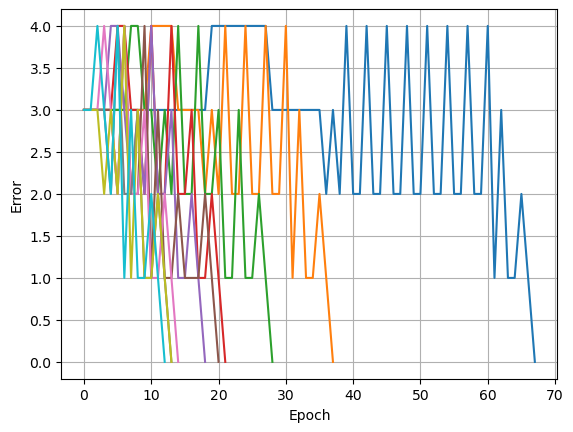

In [63]:
#3
import numpy as np
import matplotlib.pyplot as plt

# Define the step activation function
def step(x):
    return np.where(x >= 0, 1, 0)

# Define the AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Define the initial weights
w = np.array([10, 0.2, -0.75])

# Define the error threshold and maximum number of iterations
error_threshold = 0.002
max_iterations = 1000

# Vary the learning rate and plot the number of iterations taken for learning to converge
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations = []
for alpha in learning_rates:
    # Define the initial weights and learning rate
    w = np.array([10, 0.2, -0.75])
    
    # Train the perceptron
    errors = []
    for i in range(max_iterations):
        # Calculate the output and error
        output = step(np.dot(X, w[1:]) + w[0])
        error = y - output
        errors.append(np.sum(error**2))
        
        # Update the weights
        w[1:] += alpha * np.dot(X.T, error)
        w[0] += alpha * np.sum(error)
        
        # Check for convergence
        if errors[-1] <= error_threshold:
            iterations.append(i+1)
            print(f"Learning rate {alpha} converged after {i+1} iterations")
            break
            
    # Plot the error over time
    plt.plot(errors, label=f"α={alpha}")
    
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)
plt.show()




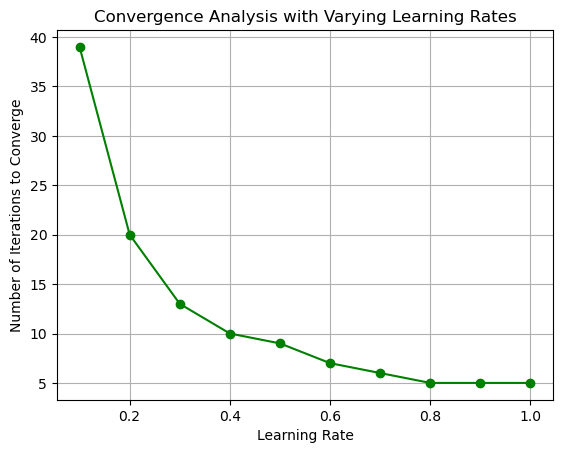

In [76]:
# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iteration_counts, marker='o', linestyle='-', color='g')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Convergence Analysis with Varying Learning Rates')
plt.grid(True)
plt.show()

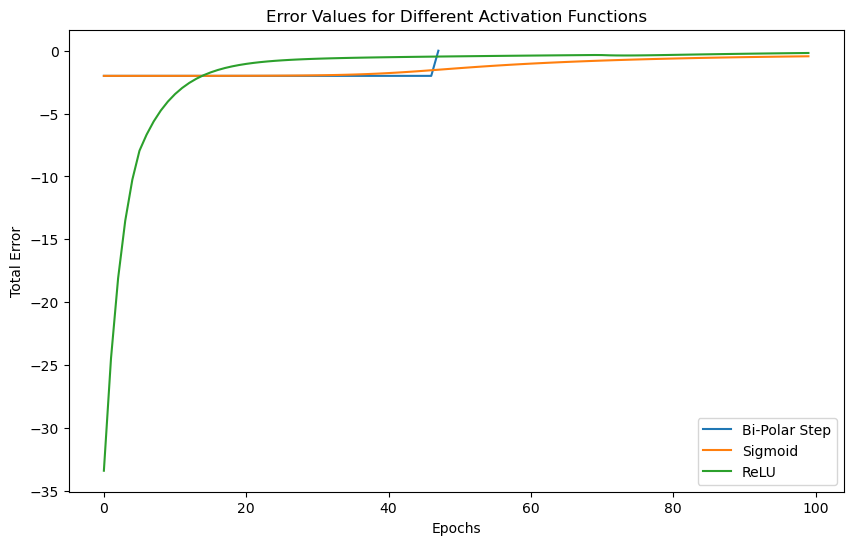

In [78]:
#4
# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Training data for AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

# Activation functions
def bi_polar_step_activation(sum):
    return -1 if sum < 0 else 1

def sigmoid_activation(sum):
    return 1 / (1 + np.exp(-sum))

def relu_activation(sum):
    return max(0, sum)

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data, activation_fn):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Apply the selected activation function
            activated_sum = activation_fn(weighted_sum)
            # Calculate the error
            error = target - activated_sum
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Test different activation functions and compare iterations
activation_functions = [("Bi-Polar Step", bi_polar_step_activation),
                        ("Sigmoid", sigmoid_activation),
                        ("ReLU", relu_activation)]

# Plot the error values for each activation function in a single graph
plt.figure(figsize=(10,6))
for i, (activation_name, activation_fn) in enumerate(activation_functions):
    trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, activation_fn)
    plt.plot(error_values, label=activation_name)
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.title('Error Values for Different Activation Functions')
    plt.legend()

plt.show()
